In [1]:
import skimage.color
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['STSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

%matplotlib inline

In [2]:
data = pd.read_csv('QJ_csv.csv', header=None)
xyz_3d = np.zeros([60,1,3])
for i in range(1,61):
    xyz_3d[i-1,0,0] = data[6][i]
    xyz_3d[i-1,0,1] = data[7][i]
    xyz_3d[i-1,0,2] = data[8][i]
xyz_3d = 1/100 * xyz_3d
xyz = xyz_3d[:,0,:]
# data.head

In [3]:
# print(xyz)

In [4]:
lab_A_3d = skimage.color.xyz2lab(xyz_3d, illuminant='A', observer='2')
lab_D50_3d = skimage.color.xyz2lab(xyz_3d, illuminant='D50', observer='2')
lab_D55_3d = skimage.color.xyz2lab(xyz_3d, illuminant='D55', observer='2')
lab_D65_3d = skimage.color.xyz2lab(xyz_3d, illuminant='D65', observer='2')
lab_D75_3d = skimage.color.xyz2lab(xyz_3d, illuminant='D75', observer='2')
lab_E_3d = skimage.color.xyz2lab(xyz_3d, illuminant='E', observer='2')

lab_A = lab_A_3d[:,0,:]
lab_D50 = lab_D50_3d[:,0,:]
lab_D55 = lab_D55_3d[:,0,:]
lab_D65 = lab_D65_3d[:,0,:]
lab_D75 = lab_D75_3d[:,0,:]
lab_E = lab_E_3d[:,0,:]

In [5]:
# Lab_3d = np.zeros([60,1,3])
# for i in range(1,61):
#     Lab_3d[i-1,0,0] = data[1][i]
#     Lab_3d[i-1,0,1] = data[2][i]
#     Lab_3d[i-1,0,2] = data[3][i]
# Lab = Lab_3d[:,0,:]
# print(lab_D65 - Lab)

In [6]:
rgb_A_3d = skimage.color.lab2rgb(lab_A_3d, illuminant='A', observer='2')
rgb_D50_3d = skimage.color.lab2rgb(lab_D50_3d, illuminant='D50', observer='2')
rgb_D55_3d = skimage.color.lab2rgb(lab_D55_3d, illuminant='D55', observer='2')
rgb_D65_3d = skimage.color.lab2rgb(lab_D65_3d, illuminant='D65', observer='2')
rgb_D75_3d = skimage.color.lab2rgb(lab_D75_3d, illuminant='D75', observer='2')
rgb_E_3d = skimage.color.lab2rgb(lab_E_3d, illuminant='E', observer='2')

rgb_A = rgb_A_3d[:,0,:]
rgb_D50 = rgb_D50_3d[:,0,:]
rgb_D55 = rgb_D55_3d[:,0,:]
rgb_D65 = rgb_D65_3d[:,0,:]
rgb_D75 = rgb_D75_3d[:,0,:]
rgb_E = rgb_E_3d[:,0,:]
# print(rgb_A)

## 画图

In [7]:
def draw_3d(Lab, rgb, title, savename):
    
    fig = plt.figure(figsize=[5,4])
    ax = fig.add_subplot(111, projection='3d')
    for i in range(60):
        zs, xs, ys = Lab[i]
        colormap = rgb[i]
        ax.scatter(xs, ys, zs, c=colormap, s=30, alpha=0.8)

    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('L')

    # ax.set_ylim([-35, -10])

    ax.set_title(title)

    fig.tight_layout()
    fig.savefig(savename)

In [8]:
def draw_2d(Lab, rgb, title, savename):
    
    fig1, axs = plt.subplots(2, 2, figsize=[6,5])
    ax = axs[0,0]
    ax.scatter(Lab[:,1], Lab[:,0], c=rgb, alpha=0.8)
    ax.set_xlabel('a')
    ax.set_ylabel('L')

    ax = axs[0,1]
    ax.scatter(Lab[:,2], Lab[:,0], c=rgb, alpha=0.8)
    ax.set_xlabel('b')
    ax.set_ylabel('L')

    ax = axs[1,0]
    ax.scatter(Lab[:,1], Lab[:,2], c=rgb, alpha=0.8)
    ax.set_xlabel('a')
    ax.set_ylabel('b')

    ax = axs[1,1]
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    fig1.tight_layout()
    fig1.savefig(savename)

### A

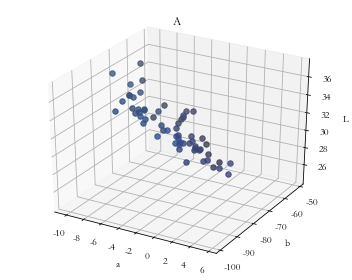

In [9]:
draw_3d(lab_A, rgb_A, u'A', 'lab_A_3d.pdf')

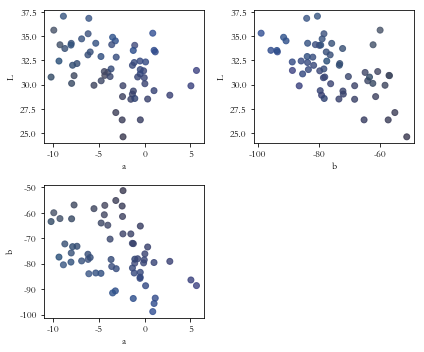

In [10]:
draw_2d(lab_A, rgb_A, u'A', 'lab_A_2d.pdf')

### D50

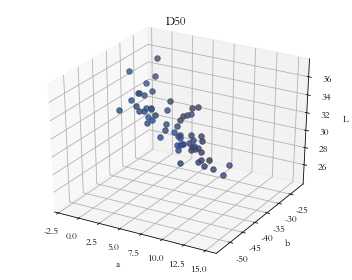

In [11]:
draw_3d(lab_D50, rgb_D50, u'D50', 'lab_D50_3d.pdf')

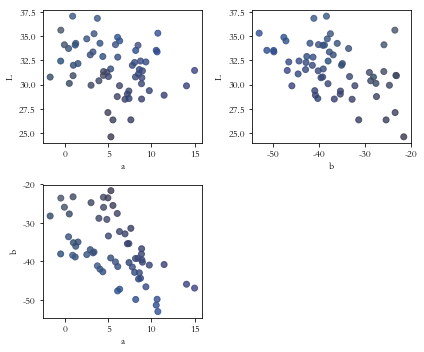

In [12]:
draw_2d(lab_D50, rgb_D50, u'D50', 'lab_D50_2d.pdf')

### D55

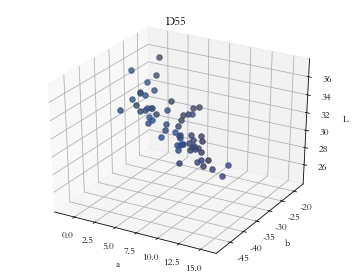

In [13]:
draw_3d(lab_D55, rgb_D55, u'D55', 'lab_D55_3d.pdf')

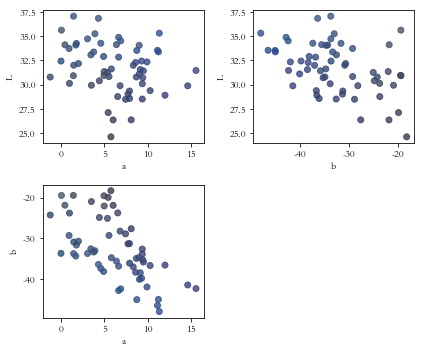

In [14]:
draw_2d(lab_D55, rgb_D55, u'D55', 'lab_D55_2d.pdf')

### D65

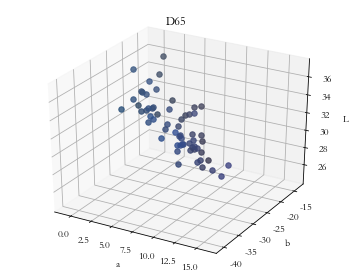

In [15]:
draw_3d(lab_D65, rgb_D65, u'D65', 'lab_D65_3d.pdf')

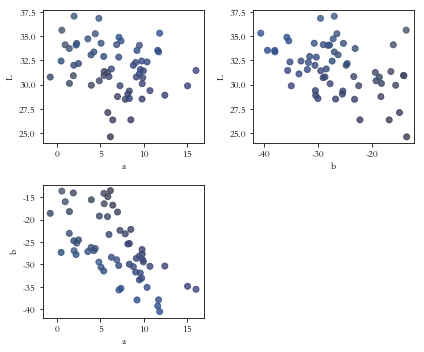

In [16]:
draw_2d(lab_D65, rgb_D65, u'D65', 'lab_D65_2d.pdf')

### D75

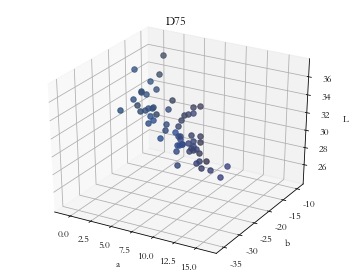

In [17]:
draw_3d(lab_D75, rgb_D75, u'D75', 'lab_D75_3d.pdf')

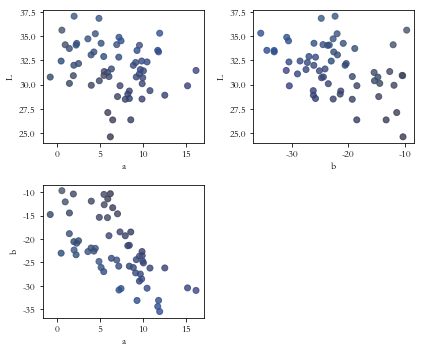

In [18]:
draw_2d(lab_D75, rgb_D75, u'D75', 'lab_D75_2d.pdf')

### E

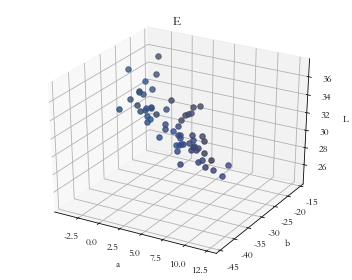

In [19]:
draw_3d(lab_E, rgb_E, u'E', 'lab_E_3d.pdf')

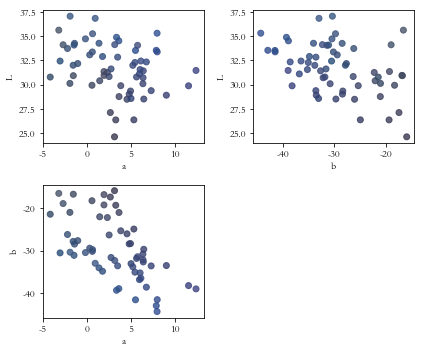

In [20]:
draw_2d(lab_E, rgb_E, u'E', 'lab_E_2d.pdf')